In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import sys
sys.path.insert(1, '/home/nicolas/code/src')
sys.path.insert(1, '/home/nicolas/code/data')

from RBM import RBM
from scipy.integrate import simps
from scipy import stats
import h5py

device = torch.device("cuda")
dtype = torch.float
torch.set_num_threads(4)
data = np.genfromtxt('../data/data_1d2c_bal_seed14.dat')
data = torch.tensor((data+1)/2, device = device, dtype = dtype)



In [2]:
fname = '../data/valGradNorm.h5'
fname2 = '../data/valGradTMC2.h5'
f = h5py.File(fname, 'r')
f2 = h5py.File(fname2, 'r')

In [3]:
print(np.array(f['negTermW1']).shape)
#print(np.array(f2['negTermW1']).shape)
f2.keys()

(20, 1000)


RuntimeError: Can't determine (addr overflow, addr = 91670832, size = 328, eoa = 91499808)

In [5]:
tmc = np.array(f2['negTermW440'])
norm = np.array(f['negTermW440'])/600

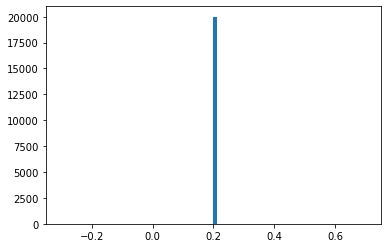

In [6]:
plt.hist(tmc.reshape(20000)/5, bins = 100);

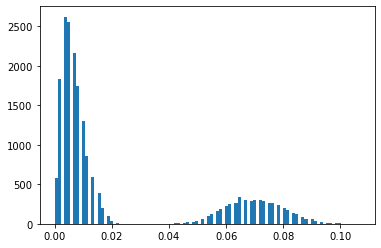

In [7]:
plt.hist(norm.reshape(20000), bins = 100);

In [8]:
norm.shape

(20, 1000)

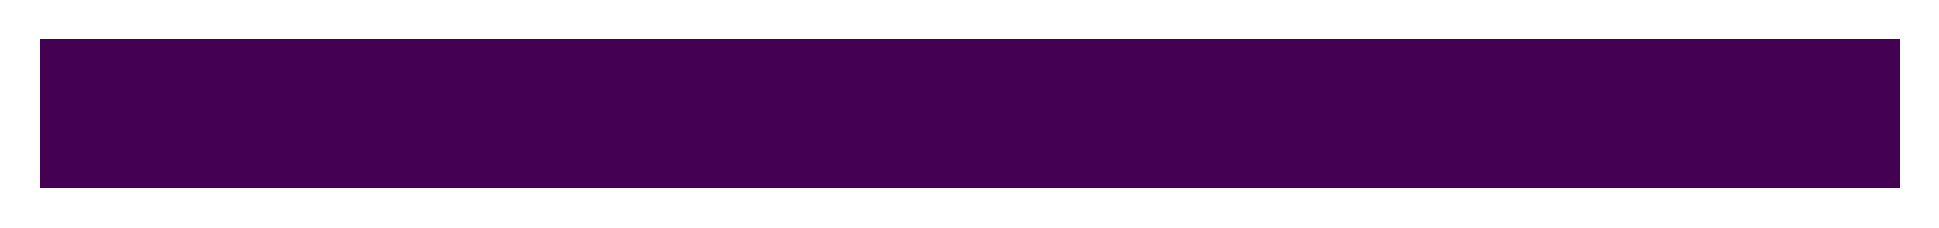

In [9]:
plt.figure(dpi = 400)
plt.axis('off')
plt.imshow(tmc.reshape(40,500))

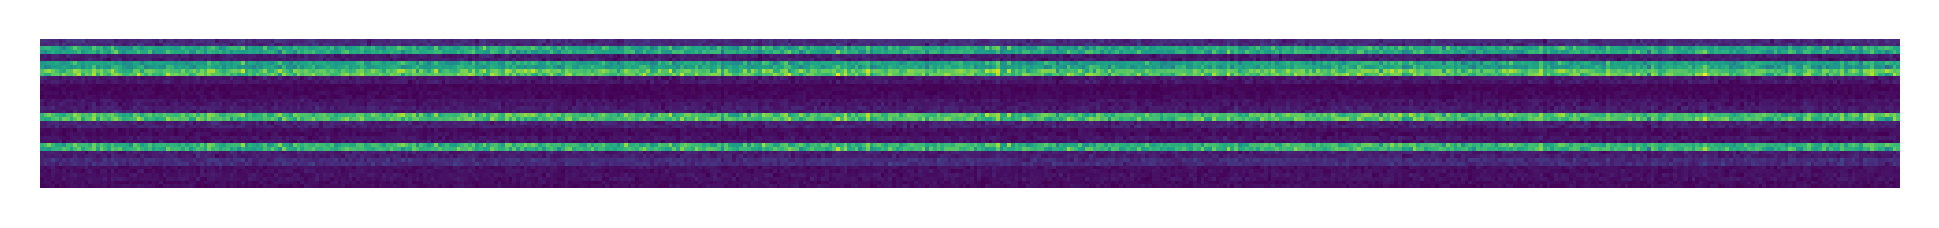

In [10]:
plt.figure(dpi = 400)
plt.axis('off')

plt.imshow(norm.reshape(40,500))

In [11]:
f2.keys()

RuntimeError: Can't determine (addr overflow, addr = 91670832, size = 328, eoa = 91499808)

In [12]:
mean_si_tmc = torch.zeros(48, device = device)
mean_si_norm = torch.zeros(48, device = device)

for i in range(100, 148):
    print(i)
    if i not in [5, 48, 49]:
        normsi = torch.tensor(f['negTermV'+str(i)], dtype = dtype, device = device)
        tmcsi = torch.tensor(f2['negTermV'+str(i)], dtype = dtype, device = device)
        mean_si_norm[i] = torch.mean(normsi)
        mean_si_tmc[i] = torch.mean(tmcsi)


100


IndexError: index 100 is out of bounds for dimension 0 with size 48

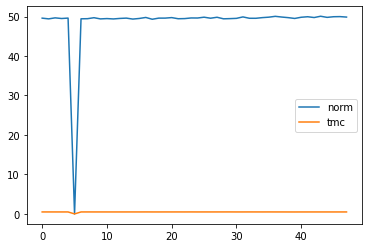

In [31]:
plt.plot(mean_si_norm.cpu(), label = 'norm')
plt.plot(mean_si_tmc.cpu(), label = 'tmc')
plt.legend()

In [28]:
mean_si_tmc

tensor([0.5000, 0.5002, 0.4997, 0.4987, 0.5000, 0.0000, 0.4989, 0.5012, 0.4988,
        0.4988, 0.4981, 0.4987, 0.4984, 0.4994, 0.5007, 0.4995, 0.5037, 0.4982,
        0.4970, 0.5010, 0.4994, 0.5015, 0.4993, 0.5044, 0.4980, 0.5017, 0.4994,
        0.5011, 0.5029, 0.5050, 0.4981, 0.4989, 0.5029, 0.5009, 0.4995, 0.5031,
        0.4989, 0.4990, 0.4957, 0.4937, 0.4976, 0.4975, 0.4979, 0.4972, 0.4981,
        0.4964, 0.4983, 0.4991, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 